# Clean & Analyze Social Media

# Introduction

Social media has become a ubiquitous part of modern life, with platforms such as Instagram, Twitter, and Facebook serving as essential communication channels. Social media data sets are vast and complex, making analysis a challenging task for businesses and researchers alike. In this project, we explore a simulated social media, for example Tweets, data set to understand trends in likes across different categories.

## Prerequisites

To follow along with this project, you should have a basic understanding of Python programming and data analysis concepts. In addition, you may want to use the following packages in your Python environment:

- pandas
- Matplotlib
- ...

These packages should already be installed in Coursera's Jupyter Notebook environment, however if you'd like to install additional packages that are not included in this environment or are working off platform you can install additional packages using `!pip install packagename` within a notebook cell such as:

- `!pip install pandas`
- `!pip install matplotlib`

## Project Scope

The objective of this project is to analyze tweets (or other social media data) and gain insights into user engagement. We will explore the data set using visualization techniques to understand the distribution of likes across different categories. Finally, we will analyze the data to draw conclusions about the most popular categories and the overall engagement on the platform.

## Step 1: Importing Required Libraries

As the name suggests, the first step is to import all the necessary libraries that will be used in the project. In this case, we need pandas, numpy, matplotlib, seaborn, and random libraries.

Pandas is a library used for data manipulation and analysis. Numpy is a library used for numerical computations. Matplotlib is a library used for data visualization. Seaborn is a library used for statistical data visualization. Random is a library used to generate random numbers.

In [146]:
#pip install tqdm git+https://github.com/JustAnotherArchivist/snscrape.git seaborn numpy pandas matplotlib

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


## Step 2: Importing the Dataset

In this step, we will import the Twitter dataset that will serve as the foundation for our analysis. The dataset contains a collection of tweets along with key attributes such as text content, number of likes, retweets, and associated hashtags. This information will allow us to explore engagement patterns, identify trends, and understand the factors that contribute to a tweet’s popularity.

You can download the dataset directly from [Kaggle](https://www.kaggle.com/datasets/jackksoncsie/twitter-dataset-keywords-likes-and-tweets?utm_source=chatgpt.com>), and then load it into your Python environment using pandas for further processing and analysis.

In [ ]:
import pandas as pd
df = pd.read_csv('tweets.csv')
df

,keyword,likes,tweet
0,COVID-19,1,The headline kinda makes it sound like the AP ...
1,COVID-19,0,ATLANTIC CITY — The city's Police Athletic Lea...
2,COVID-19,0,I feel like Diana's line she draws is if his s...
3,COVID-19,1,COVID-19 was the single most fatal communicabl...
4,COVID-19,0,Studies: Dogs can detect COVID-19 with greater...
...,...,...,...
128832,World Cup,1,He is in Argentina to play the U20 World Cup
128833,World Cup,0,Messi this season in every competition 60g/a w...
128834,World Cup,29,🚨#2026WCQ 54 African countries will be divided...
128835,World Cup,0,England’s adopted World Cup mascot ‘Dave the C...


Once the dataset has been successfully loaded into our environment, we are ready to proceed to the next step of the analysis. This will involve cleaning the data, extracting relevant features such as hashtags and engagement metrics, and preparing it for visualization and further exploration.

## Step 3: Analyzing the dataset structure

After importing the dataset, we can examine its structure to understand the type of data we will be working with.


In [148]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 128837 entries, 0 to 128836
Data columns (total 3 columns):
 #   Column   Non-Null Count   Dtype 
---  ------   --------------   ----- 
 0   keyword  128837 non-null  object
 1   likes    128837 non-null  int64 
 2   tweet    128837 non-null  object
dtypes: int64(1), object(2)
memory usage: 2.9+ MB


The dataset consists of 128,837 entries and contains the following three columns:
- keyword (object): The main keyword or topic associated with each tweet.
- likes (int64): The number of likes each tweet has received, serving as a key metric of engagement.
- tweet (object): The text content of the tweet itself.

With a total memory usage of approximately 2.9 MB, the dataset is manageable for exploratory data analysis and allows us to perform statistical calculations, feature extraction, and visualizations efficiently.

Now let's clean the dataset to focus on tweets that are relevant for our analysis. First, we will remove tweets with 0 likes, as they do not provide meaningful engagement data. Next, we will set a threshold for likes to classify a post as “viral”; for this analysis, we will consider tweets with at least 4,000 likes.

In [149]:
df_cleaned = df.query("likes >= 4000")
df_cleaned.count()

keyword    114
likes      114
tweet      114
dtype: int64

## Step 4: Analyzing dataset information

The first step is to identify the unique keywords and count the number of tweets associated with each category. This provides an overview of the dataset’s composition and highlights which topics are most represented, serving as a foundation for further analysis of engagement metrics, trends, and potential insights.

In [150]:
df["keyword"].unique()

array(['COVID-19', 'Vaccine', 'Zoom', 'Bitcoin', 'Dogecoin', 'NFT',
       'Elon Musk', 'Tesla', 'Amazon', 'iPhone 12', 'Remote work',
       'TikTok', 'Instagram', 'Facebook', 'YouTube', 'Netflix',
       'GameStop', 'Super Bowl', 'Olympics', 'Black Lives Matter',
       'Jeffrey Dahmer', 'Johnny Depp', 'Will Smith', 'Weather', 'xvideo',
       'porn', 'nba', 'Macdonald', 'India vs England', 'Ukraine',
       'Queen Elizabeth', 'World Cup'], dtype=object)

These keywords provide a clear overview of the dataset's composition. After this we will group the tweets by keyword and compute descriptive statistics using the .describe() method. This provides a comprehensive view of engagement metrics for each category, including the mean, standard deviation, minimum, maximum, median, and key percentiles.

In [151]:
df_cleaned.groupby("keyword").describe()

likes                                                 \
                   count          mean           std      min       25%   
keyword                                                                   
Amazon               1.0   9898.000000           NaN   9898.0   9898.00   
Bitcoin             12.0  18753.333333   7850.394505   4014.0  16544.75   
Black Lives Matter   1.0   4384.000000           NaN   4384.0   4384.00   
COVID-19             3.0  12912.000000  12895.107716   4651.0   5482.50   
Dogecoin            11.0  20692.909091   6846.144118   7721.0  17678.50   
Elon Musk            2.0   4469.500000    284.964033   4268.0   4368.75   
Facebook             6.0  16500.833333  14739.688320   4094.0   4910.50   
GameStop             2.0  18558.000000  12442.250922   9760.0  14159.00   
India vs England     2.0   9177.500000   7026.520085   4209.0   6693.25   
Jeffrey Dahmer       3.0   7021.000000   2936.636852   4195.0   5503.00   
Johnny Depp          4.0  36652.500000  37338.696902   6155.0   6408.50   
Macdonald            2.0  13648.000000   2358.908222  11980.0  12814.00   
NFT                  1.0  44715.000000           NaN  44715.0  44715.00   
Netflix             16.0  12616.437500   9227.713332   4089.0   6343.00   
Olympics             1.0   5097.000000           NaN   5097.0   5097.00   
Queen Elizabeth      7.0  12570.285714  15340.158666   4121.0   4515.00   
Super Bowl           1.0   4129.000000           NaN   4129.0   4129.00   
Tesla                2.0  27981.500000   8988.034296  21626.0  24803.75   
Ukraine              4.0   8129.000000   4419.706551   4374.0   4664.25   
Vaccine              5.0   6931.600000   3094.030349   4359.0   5263.00   
Weather              2.0   5998.000000   1500.480590   4937.0   5467.50   
Will Smith           1.0   5091.000000           NaN   5091.0   5091.00   
World Cup           10.0  11346.700000  10023.619440   4092.0   5922.50   
YouTube              3.0   7445.666667   3282.166409   4710.0   5626.00   
Zoom                 3.0  18261.333333  18842.326458   5409.0   7446.50   
iPhone 12            1.0   4858.000000           NaN   4858.0   4858.00   
nba                  7.0  16993.000000  12078.393905   6421.0   7629.00   
porn                 1.0   4013.000000           NaN   4013.0   4013.00   

                                                
                        50%       75%      max  
keyword                                         
Amazon               9898.0   9898.00   9898.0  
Bitcoin             21586.0  23270.75  28527.0  
Black Lives Matter   4384.0   4384.00   4384.0  
COVID-19             6314.0  17042.50  27771.0  
Dogecoin            19040.0  27192.00  29088.0  
Elon Musk            4469.5   4570.25   4671.0  
Facebook            11105.5  25498.00  39559.0  
GameStop            18558.0  22957.00  27356.0  
India vs England     9177.5  11661.75  14146.0  
Jeffrey Dahmer       6811.0   8434.00  10057.0  
Johnny Depp         28806.0  59050.00  82843.0  
Macdonald           13648.0  14482.00  15316.0  
NFT                 44715.0  44715.00  44715.0  
Netflix             10281.5  14481.50  39557.0  
Olympics             5097.0   5097.00   5097.0  
Queen Elizabeth      5501.0  11856.50  45627.0  
Super Bowl           4129.0   4129.00   4129.0  
Tesla               27981.5  31159.25  34337.0  
Ukraine              7239.0  10703.75  13664.0  
Vaccine              6314.0   6471.00  12251.0  
Weather              5998.0   6528.50   7059.0  
Will Smith           5091.0   5091.00   5091.0  
World Cup            8402.0  11075.00  38190.0  
YouTube              6542.0   8813.50  11085.0  
Zoom                 9484.0  24687.50  39891.0  
iPhone 12            4858.0   4858.00   4858.0  
nba                 12053.0  24251.00  36717.0  
porn                 4013.0   4013.00   4013.0

During the descriptive analysis, we noticed that some categories Instagram and porn have NaN for the standard deviation. In plain terms, this means there’s either no variation or just a couple of lonely tweets in these categories; basically, not enough action to analyze. So, we’ll drop them and focus on the keywords that actually bring some excitement to the dataset.

> Side note: I totally expected the last one… not surprised.

In [152]:
df_clean_describe = df_cleaned.groupby("keyword").describe().dropna()

df_dropped = df_cleaned.query("keyword in @df_clean_describe.index").drop('tweet', axis=1)

df_dropped

,keyword,likes
105,COVID-19,27771
181,COVID-19,4651
737,COVID-19,6314
5275,Vaccine,5263
6351,Vaccine,12251
...,...,...
126947,World Cup,7163
126950,World Cup,4777
127911,World Cup,11352
128507,World Cup,9363


Now, let's visualize how likes are distributed across categories. By plotting a distribution curve for each keyword, we can see at a glance where most tweets fall in terms of engagement.

Tweets with their peak shifted to the left represent categories with lower likes, while those whose curve leans to the right belong to topics that regularly achieve higher engagement.

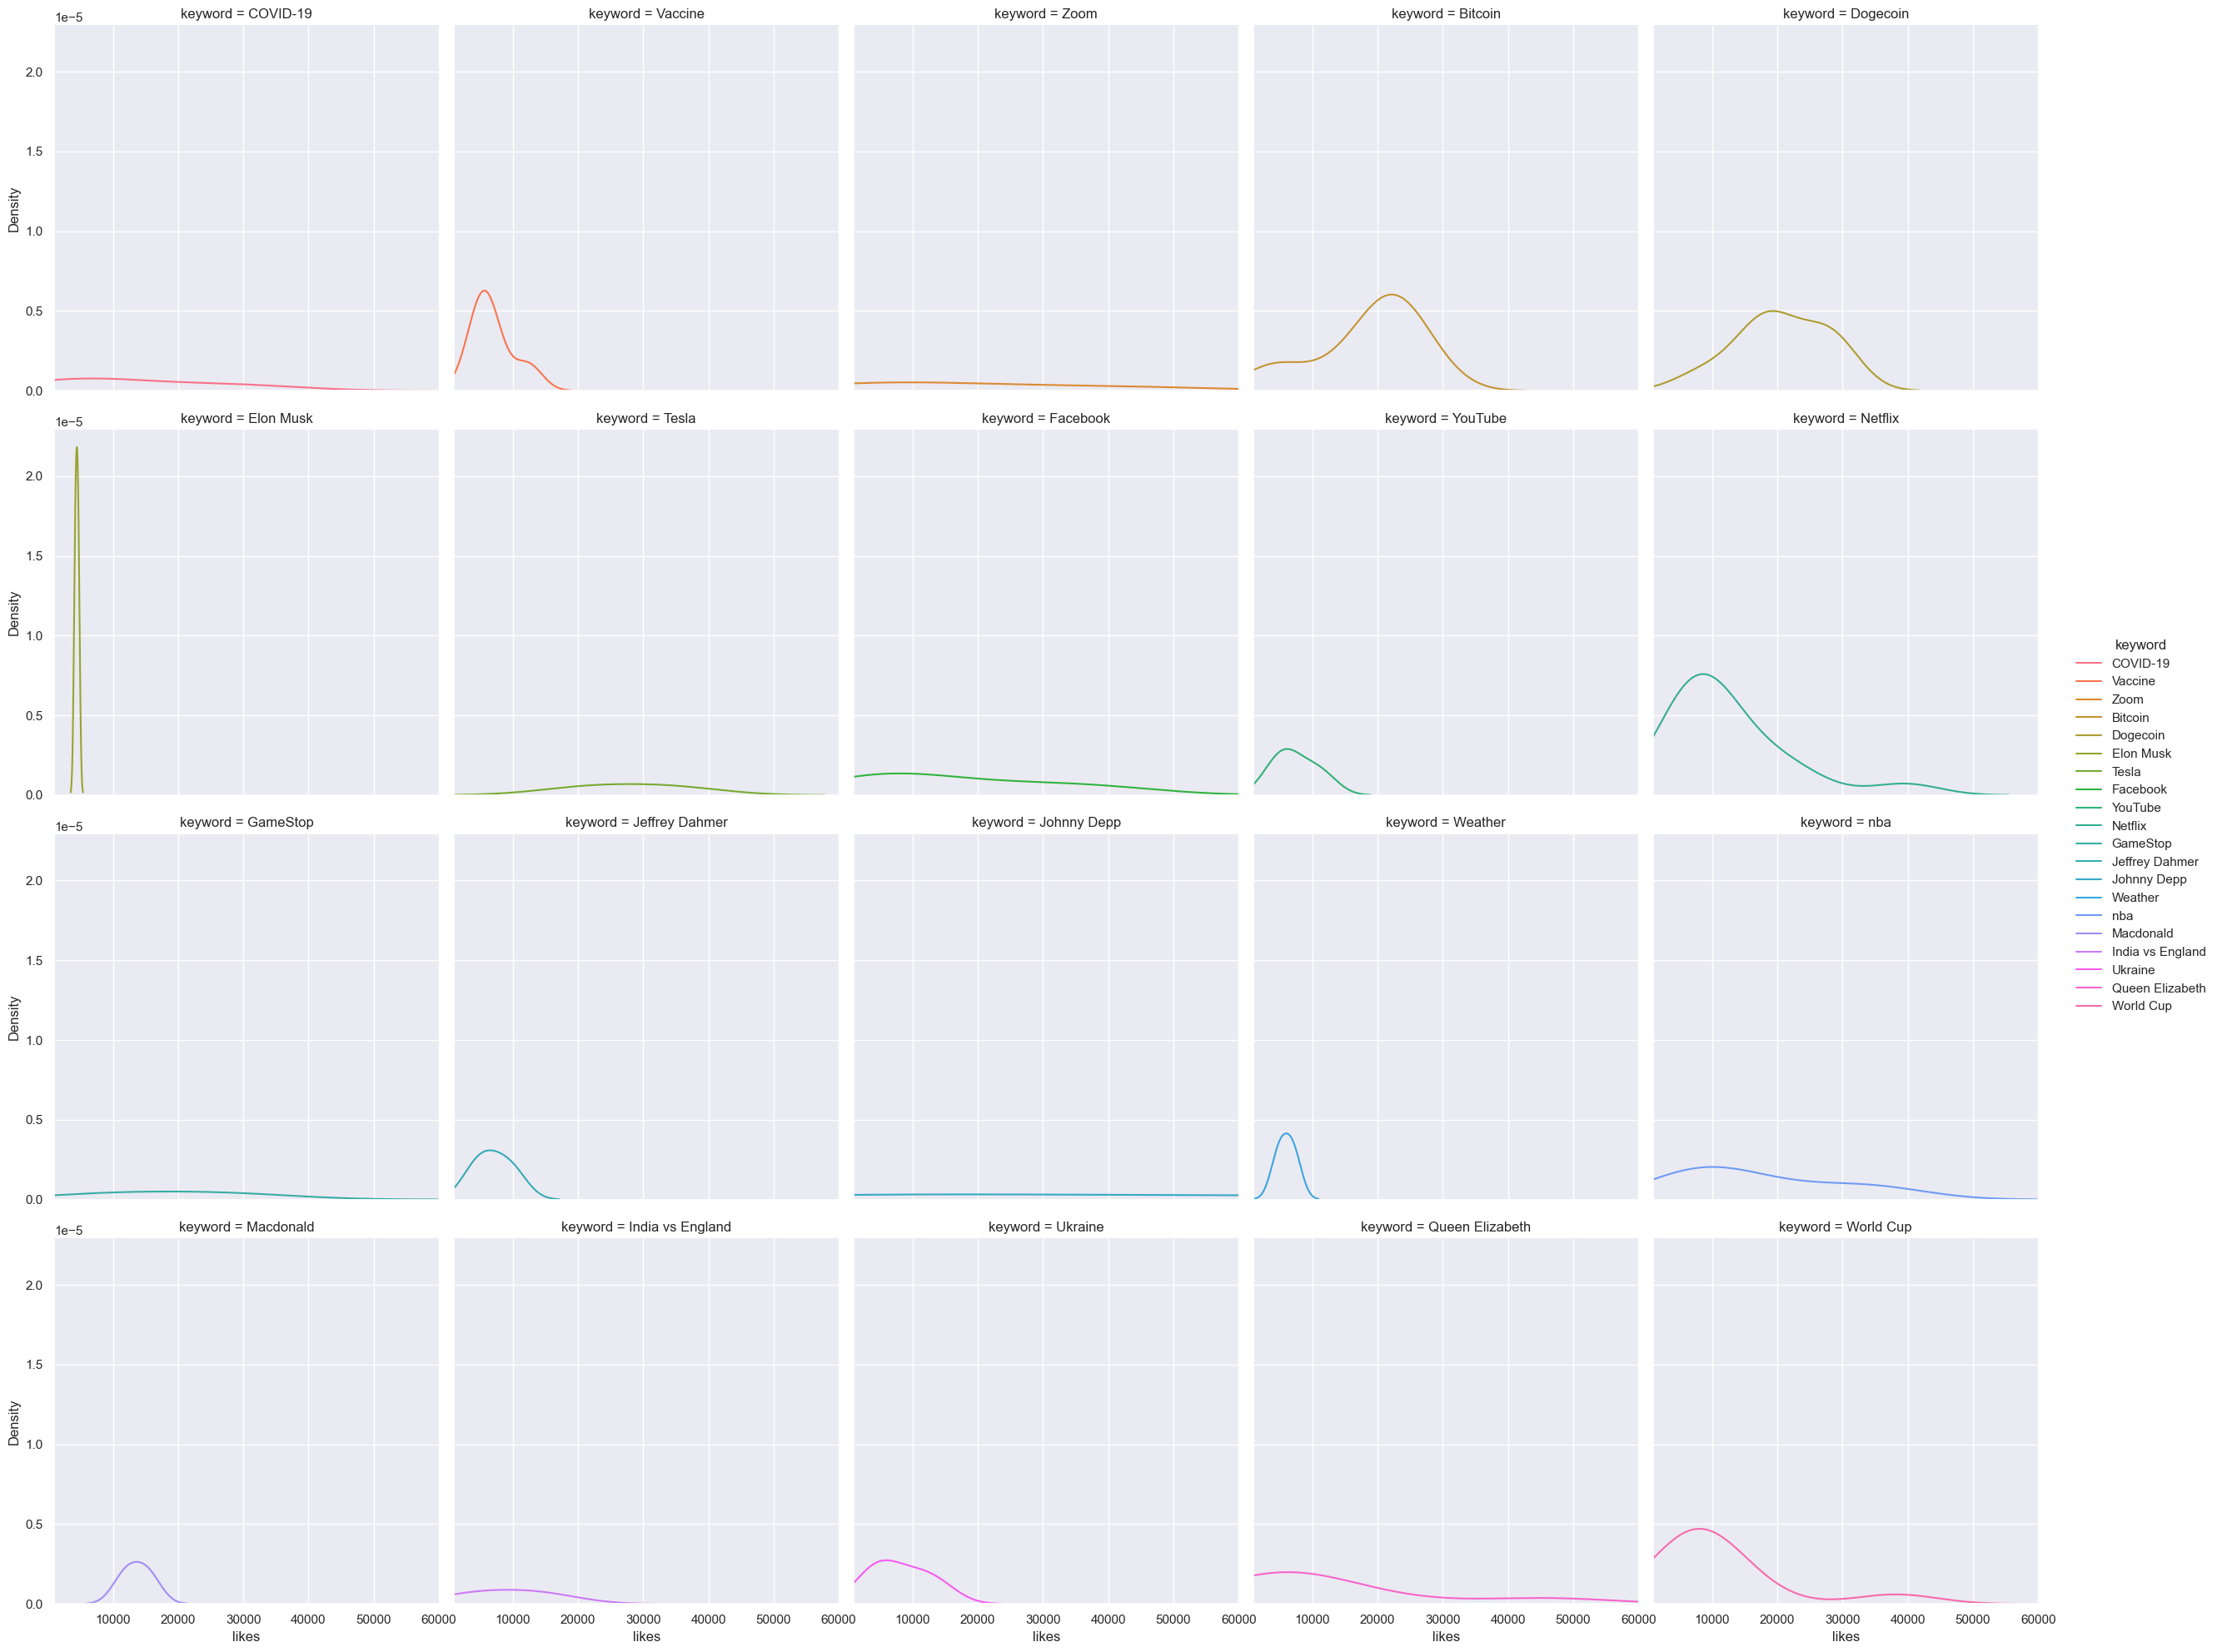

In [153]:
sns.displot(df_dropped, x="likes", hue="keyword", kind="kde", col_wrap=5, col="keyword").set(xlim=(1_000, 60_000))

Next, let's focus on the top 8 categories with the highest 25th percentile (Q1). Why? Because a high Q1 means that even the bottom 25% of tweets in that category are already pulling strong engagement.

In other words, if Q1 is above 1,000 likes, at least 75% of the tweets in that category are viral, not just one lucky post hitting big numbers.

We'll visualize this using a bar chart to clearly see which topics consistently deliver high-performing tweets:

<Axes: xlabel='keyword', ylabel='likes'>

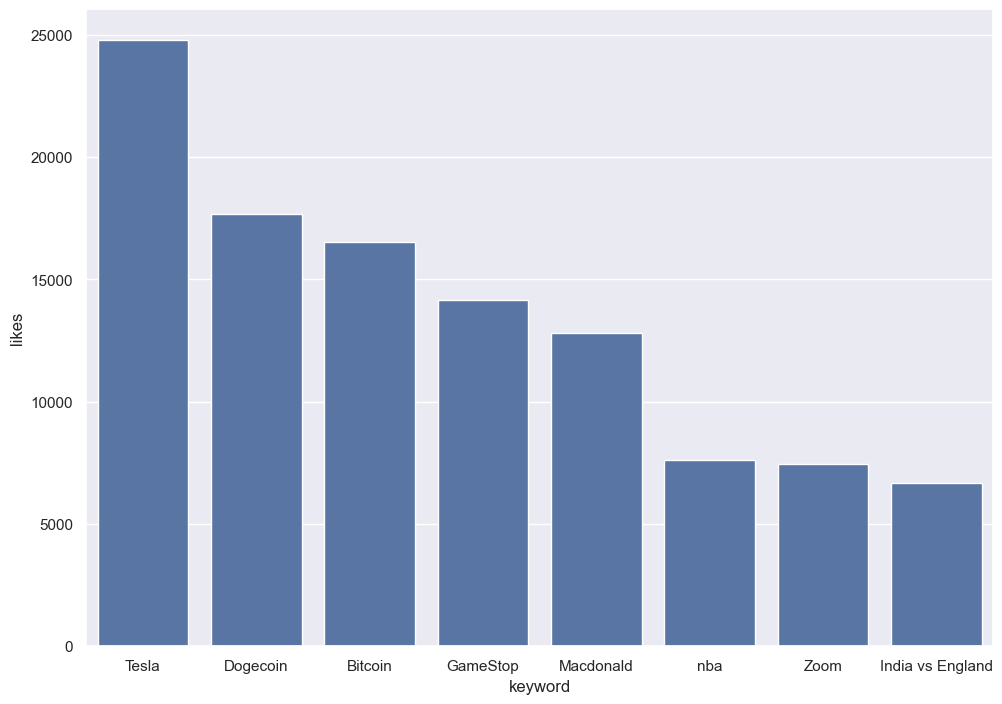

In [154]:
df_grouped = df_dropped.groupby(["keyword"]).quantile([0.25]).sort_values(by="likes", ascending=False).head(8)
sns.barplot(df_grouped, x="keyword", y="likes")

## Step 5: Set a conclusion

From this analysis, we identified the top 8 categories with the highest 25th percentile of likes (Tesla, Dogecoin, Bitcoin, GameStop, Macdonald, NBA, Zoom, and India vs England) which means that at least 75% of the content in these areas surpasses 4,000 likes. This shows they deliver consistent engagement, not just isolated viral spikes, and currently dominate online conversations.

These insights and actions directly address our three project objectives:

1. Increase client reach and engagement: by prioritizing categories that already show strong baseline performance and adjusting as new trends emerge, we ensure maximum visibility and interaction.
2. Gain valuable insights to improve social media performance: understanding both the current drivers of virality and their temporal nature allows for smarter, evidence-based strategic planning.
3. Achieve social media goals with data-driven recommendations: our approach grounds decision-making in real metrics and predictive insights, ensuring that resources are directed toward content with the highest potential return.

## Step 6: Following steps

It’s important to highlight that these are modal trends; highly engaging topics shaped by present cultural and social dynamics. Their influence is powerful but likely time-limited, meaning strategies must remain agile and forward-looking to sustain success.

With this in mind, we propose the following future-focused actions:

- Continuous trend tracking: monitor emerging keywords and shifts in engagement patterns to detect new high-potential topics early.
- Adaptive content strategies: regularly update campaign focus to align with evolving audience interests.
- Predictive analytics: use historical data to forecast which categories are likely to rise in engagement next.
- Niche exploration: test subtopics within these main categories to diversify reach and tap into more specific communities.
- Format experimentation: vary post types (threads, polls, videos) to maintain engagement even as trends change.